## Import all required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [3]:
#Import package PyTorch for Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## Read the customer churn Scaled dataset

In [4]:
df=pd.read_csv('StandardScaledData.csv')

In [5]:
df

,CustomerID,Age,Gender,Account_Length,Contract_Type,Churn,Call_Duration,Data_Usage,Income
0,1,56,1,13,2,1,0.891801,0.885578,-0.763448
1,2,69,1,22,2,0,1.178808,-1.172610,-1.512973
2,3,46,0,19,1,1,1.686321,-0.270391,-1.110187
3,4,32,1,34,0,0,-0.329729,-0.397266,0.096798
4,5,60,1,14,0,0,0.457790,-0.862472,-1.452172
...,...,...,...,...,...,...,...,...,...
995,996,18,1,16,2,0,-1.537259,0.399225,-1.510702
996,997,35,0,34,0,1,1.143808,0.850335,-0.770949
997,998,49,0,2,0,0,-1.603761,-0.813132,1.168657
998,999,64,1,35,0,1,-0.914244,0.469711,-0.547369


In [6]:
X = df.drop(columns = "Churn")
y = df.Churn

#X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [7]:
oversample = SMOTE()

In [8]:
X1, y1 = oversample.fit_resample(X,y)

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.33)

## Defining the common evalaution techniques as function

In [10]:
# For logistic Regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [11]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

In [12]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [13]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

## KNN Algorithm

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

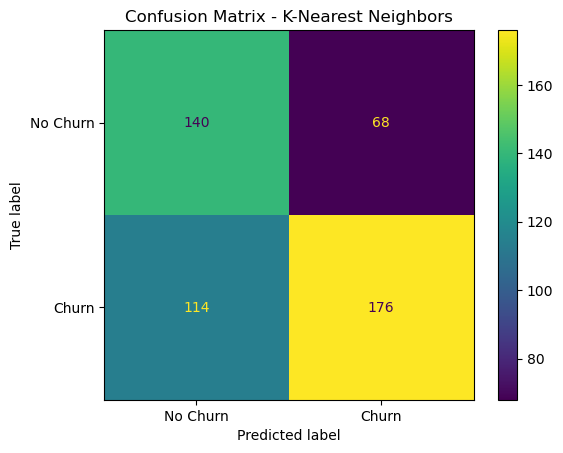

Accuracy Score Test = 0.6345381526104418
Accuracy Score Train = 0.7297029702970297




In [15]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

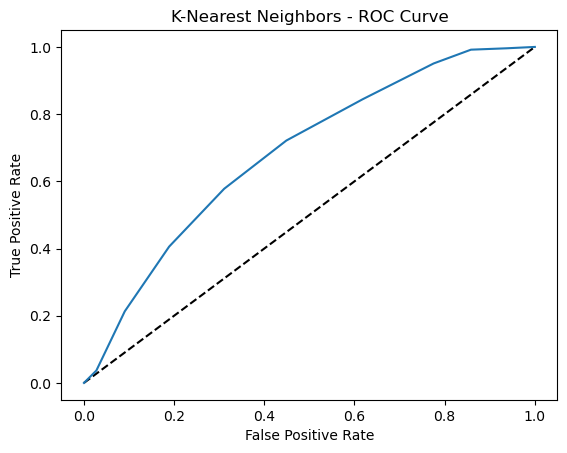

AUC Score (ROC):0.6836598037950175


In [16]:
roc_curve_auc_score(X_test,y_test,y_pred_knn_proba, "K-Nearest Neighbors")

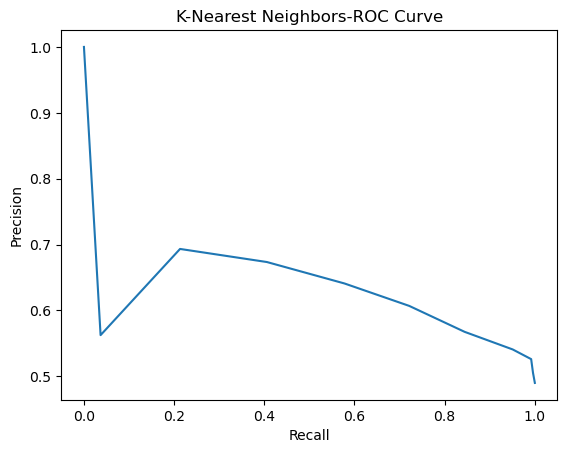

f1 Score : 0.6591760299625468 
 AUC Score (PR) : 0.6309887470027971


In [17]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_proba,"K-Nearest Neighbors")

## Logistic Regression

In [359]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1500,random_state=0, n_jobs=14)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

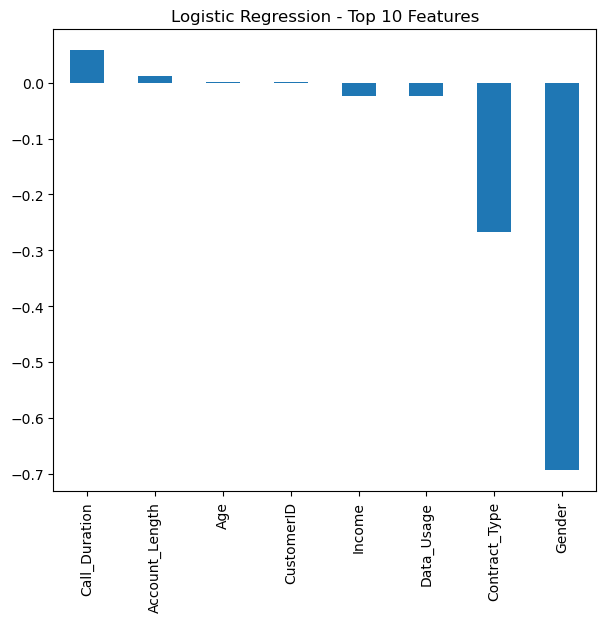

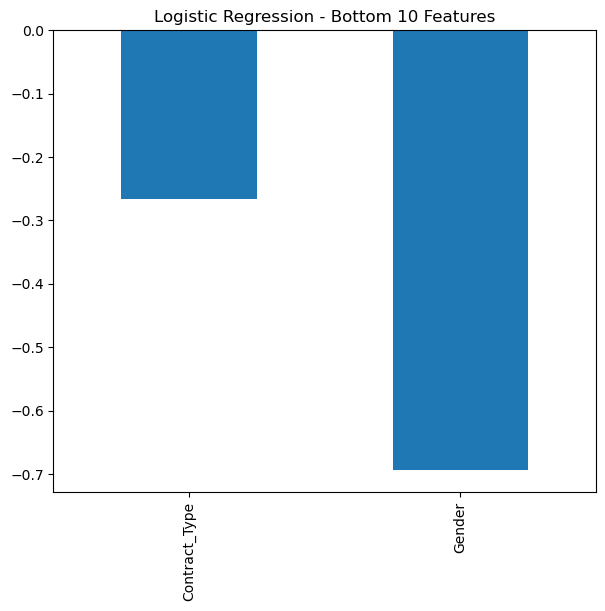

In [360]:
feature_weights(X_train,logreg,"Logistic Regression")

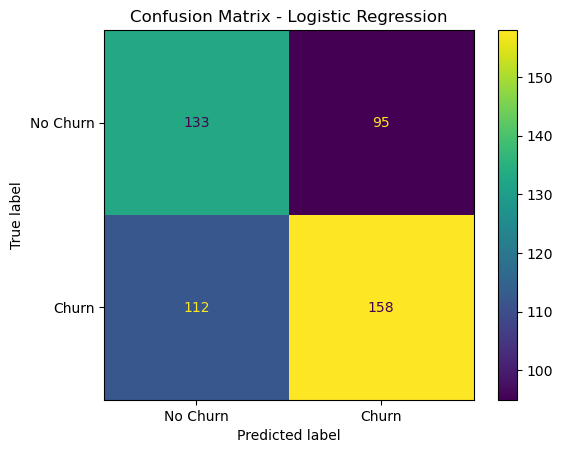

Accuracy Score Test = 0.5843373493975904
Accuracy Score Train = 0.5910891089108911




In [361]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

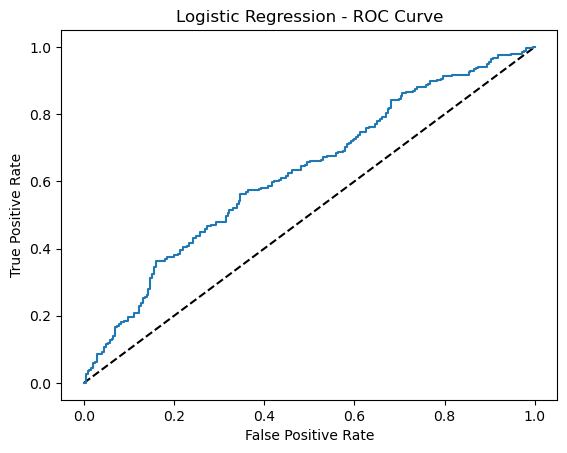

AUC Score (ROC):0.6249737839799951


In [362]:
roc_curve_auc_score(X_test,y_test,y_pred_logreg_proba, "Logistic Regression")

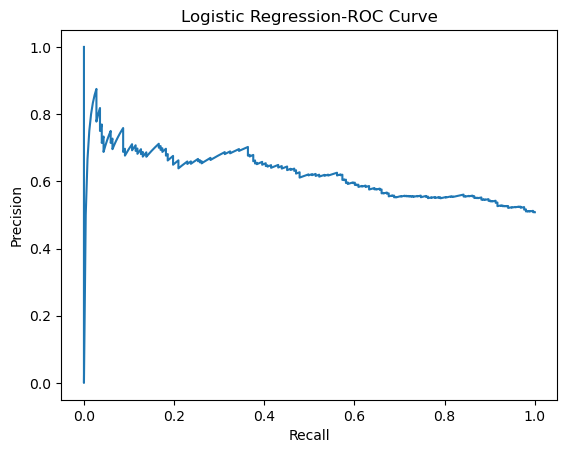

f1 Score : 0.6428571428571428 
 AUC Score (PR) : 0.6198364424455912


In [363]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_logreg_proba,"Logistic Regression")

## SVM

In [29]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.4779116465863454


In [30]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48       254
           1       0.47      0.49      0.48       244

    accuracy                           0.48       498
   macro avg       0.48      0.48      0.48       498
weighted avg       0.48      0.48      0.48       498



## Random Forest

In [366]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                 max_leaf_nodes = 30)

#model_rf=RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=10, min_samples_leaf=5)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7068273092369478


In [367]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       245
           1       0.71      0.72      0.71       253

    accuracy                           0.71       498
   macro avg       0.71      0.71      0.71       498
weighted avg       0.71      0.71      0.71       498



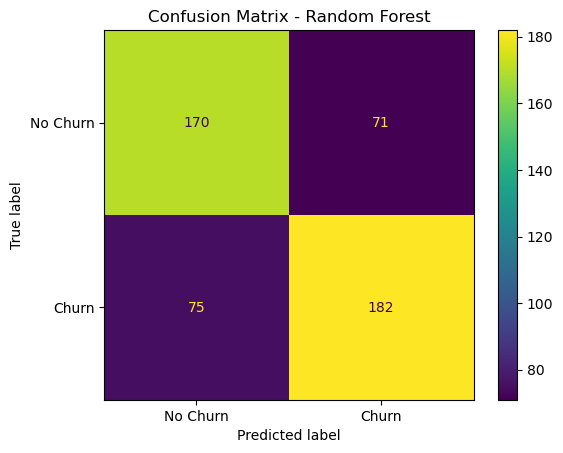

Accuracy Score Test = 0.7068273092369478
Accuracy Score Train = 0.8425742574257425




In [368]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, prediction_test, model_rf, "Random Forest")

In [369]:
y_rfpred_prob = model_rf.predict_proba(X_test)#[:,1]
#fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
#plt.plot([0, 1], [0, 1], 'k--' )
#plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "b")
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Random Forest ROC Curve',fontsize=16)
#plt.show();

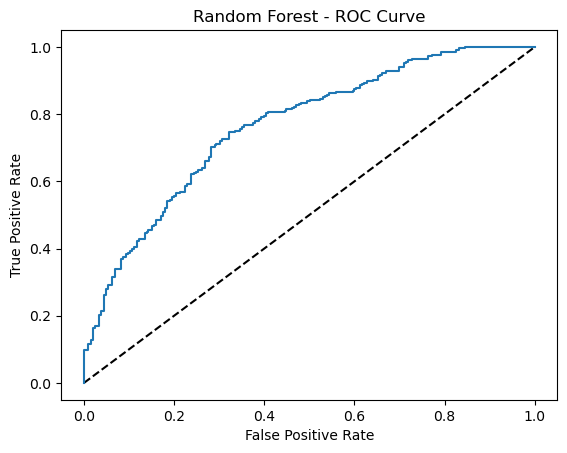

AUC Score (ROC):0.7641364846333789


In [370]:
roc_curve_auc_score(X_test,y_test,y_rfpred_prob, "Random Forest")

## Hyperparameter Tuning - By finding the best parameters using CV

## Final Model- RANDOM FOREST with tuned hyper parameters - 79% AUC

In [183]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(model_rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features='auto',
                                                    max_leaf_nodes=30,
                                                    n_estimators=500, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=50),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B60A4CD410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6081B1350>})

In [184]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 340}


In [371]:
model_rf=RandomForestClassifier(criterion = "gini",n_estimators=348,random_state = 10,max_depth=14, min_samples_leaf=5)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7088353413654619


In [372]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       245
           1       0.71      0.72      0.72       253

    accuracy                           0.71       498
   macro avg       0.71      0.71      0.71       498
weighted avg       0.71      0.71      0.71       498



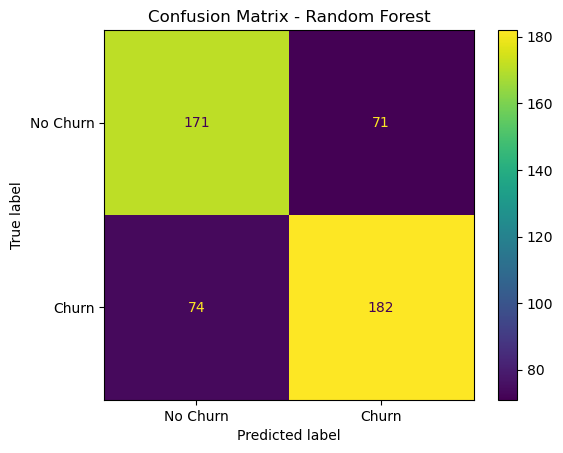

Accuracy Score Test = 0.7088353413654619
Accuracy Score Train = 0.9227722772277228




In [373]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, prediction_test, model_rf, "Random Forest")

In [374]:
y_rfpred_prob = model_rf.predict_proba(X_test)

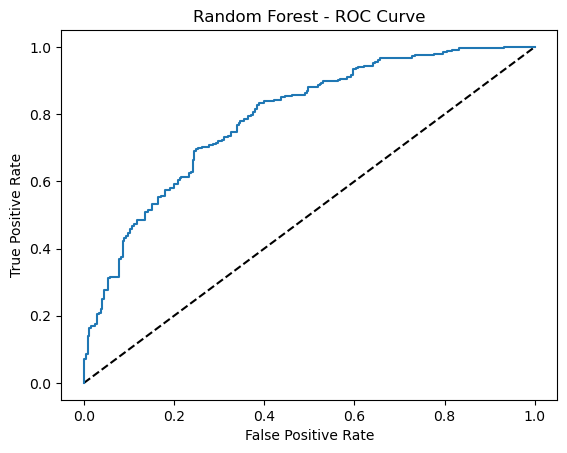

AUC Score (ROC):0.7901589094135678


In [375]:
roc_curve_auc_score(X_test,y_test,y_rfpred_prob, "Random Forest")

## Decision Tree Classifier

In [384]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.6767068273092369


In [385]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       245
           1       0.68      0.69      0.68       253

    accuracy                           0.68       498
   macro avg       0.68      0.68      0.68       498
weighted avg       0.68      0.68      0.68       498



## Adaboost classifier

In [386]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.6265060240963856

In [387]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       245
           1       0.62      0.69      0.65       253

    accuracy                           0.63       498
   macro avg       0.63      0.63      0.62       498
weighted avg       0.63      0.63      0.62       498



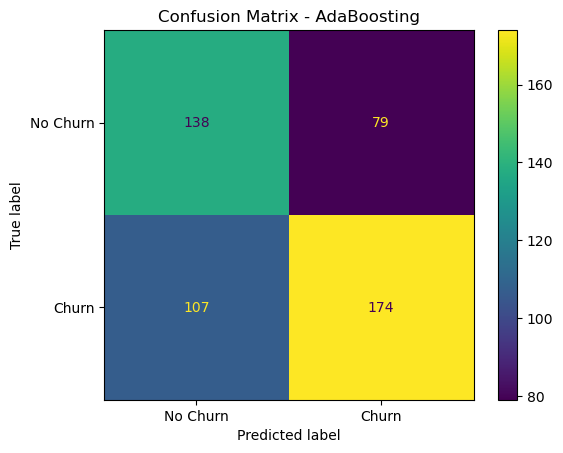

Accuracy Score Test = 0.6265060240963856
Accuracy Score Train = 0.7297029702970297




In [388]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, a_preds, a_model, "AdaBoosting")

## Gradient Boosting Classifier

In [20]:
gb = GradientBoostingClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7088353413654619


In [21]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       254
           1       0.68      0.77      0.72       244

    accuracy                           0.71       498
   macro avg       0.71      0.71      0.71       498
weighted avg       0.71      0.71      0.71       498



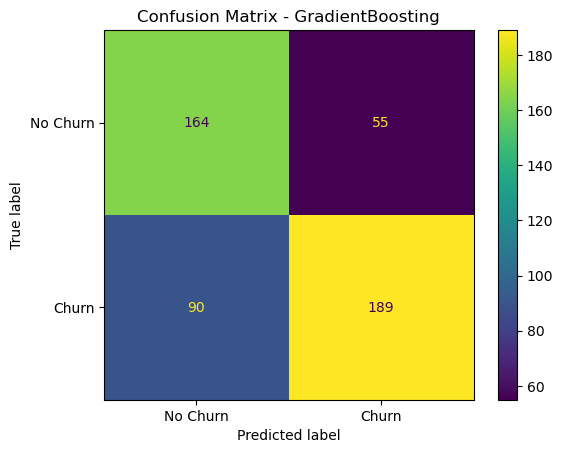

Accuracy Score Test = 0.7088353413654619
Accuracy Score Train = 0.997029702970297




In [22]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, gb_pred, gb, "GradientBoosting")